# Interview Assingment

In [17]:
import os, random
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

HTTP_METHODS = ['GET', 'HEAD', 'POST', 'PUT', 'DELETE', 'CONNECT', 'OPTIONS', 'TRACE', 'PATCH']

Methods for loading individual requests from dataset. `load_requests_from_file` splits the files at the HTTP_METHODS keywords. `load_dataset` then merges train and test data in order to use supervised learning, returning tuple of shuffled requests and coresponding labels.

##### Labels
* 0 - normal request
* 1 - anomalous request

In [20]:
def load_requests_from_file(fname):
    requests = []
    
    with open(fname) as f:
        request = ""
        for line in f:
            if line.split(" ")[0] in HTTP_METHODS and len(request) > 0:
                requests.append(request.strip())
                request = ""
            request = request + line
            
    return requests

def load_dataset(dataset_dir):
    train_normal_requests = load_requests_from_file(os.path.join(dataset_dir, 'normalTrafficTraining.txt'))
    test_normal_requests = load_requests_from_file(os.path.join(dataset_dir, 'normalTrafficTest.txt'))
    test_anomalous_requests = load_requests_from_file(os.path.join(dataset_dir, 'anomalousTrafficTest.txt'))

    requests = []
    labels = []
    
    for request in train_normal_requests + test_normal_requests:
        requests.append(request)
        labels.append(0)
        
    for request in test_anomalous_requests:
        requests.append(request)
        labels.append(1)
        
    # Shuffle both requests and labels with same seed
    random.seed()
    seed = random.randint(1, 100)
    random.seed(seed)
    random.shuffle(requests)
    random.seed(seed)
    random.shuffle(labels)
    
    return (requests, np.array(labels))

Methods for getting metrics from the dataset and its plotting features.

Total number of requests: 97062
Number of normal requests: 71998
Number of anomalous requests: 25064
Median of requests lengths: 517.0


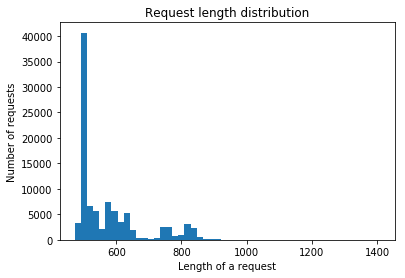

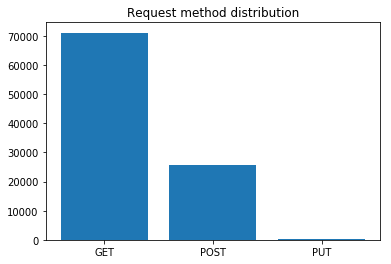

In [21]:
def get_requests_lens_median(requests):
    lengths = [len(r) for r in requests]
    return np.median(lengths)

def plot_request_length_distribution(requests):
    plt.hist([len(r) for r in requests], 50)
    plt.xlabel('Length of a request')
    plt.ylabel('Number of requests')
    plt.title('Request length distribution')
    plt.show()
    
def plot_request_method_distribution(requests):
    counter = Counter([r.split(" ")[0] for r in requests])
    plt.bar(range(len(counter)), list(counter.values()))
    plt.xticks(range(len(counter)), list(counter.keys()))
    plt.title('Request method distribution')
    plt.show()

requests, labels = load_dataset('dataset')

print("Total number of requests: {}".format(len(requests)))
print("Number of normal requests: {}".format(np.count_nonzero(labels == 0)))
print("Number of anomalous requests: {}".format(np.count_nonzero(labels == 1)))
print("Median of requests lengths: {}".format(get_requests_lens_median(requests)))
plot_request_length_distribution(requests)
plot_request_method_distribution(requests)